___
# Lecture 3 - Regression and Interpretting Statistical Significance
___

## Review

* `PCA` is a good way to assess the quality of our data
* We can create informative plots of our data with `matplotlib`
* `Pandas` dataframes can be filtered/subsetted
* **Data pre-processing is important to remove noise for downstream analysis!**

## Lesson Outline

#### (1) [Introduction to regression](#1)
#### (2) [Motivation](#2)
#### (3) [Setup](#3)
#### (4) [Regression for feature selection](#4)
#### (5) [Additional Materials](#5)
   - [Extra challenges](#5a)
   - [Extra resources](#5b)

## Introduction to Regression <a class="anchor" id="1"></a>

#### Linear regression:
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/1200px-Linear_regression.svg.png" width="500" height="500">

\begin{equation*}\LARGE Y(x_i) = B_0 + B_1x_i + \epsilon_i \end{equation*}

Note: `Y` is our `dependent` variable, and our `x` is our `independent` variable

## Motivation <a class="anchor" id="2"></a>

#### Can be used for `classification` and `feature selection`

#### Examples from research
* Genome Wide Association Studies (GWAS)
* Drug sensitivity
* CRISPR off-target effects

## Setup <a class="anchor" id="3"></a>

Import neccessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load expression data

In [2]:
expr_data_meta = pd.read_csv("inSphero.abundance.table_edit190410_filtered.csv",index_col=0)
expr_data = expr_data_meta.drop("symbol",axis=1)
annots = expr_data_meta.loc[:,["symbol"]]

In [3]:
expr_data.head()

,baseline_1,baseline_2,baseline_3,DE.BSA.DMSO.day5_2,DE.BSA.DMSO.day5_3,DE.FFA.LPS.day5_1,DE.FFA.LPS.day5_2,DE.FFA.LPS.day5_3,DE.TMC.day5_1,DE.TMC.day5_3
gene_id,,,,,,,,,,
ENSG00000241362,0.496074,0.496074,0.496074,0.142103,0.146415,0.576008,-4.714800,-0.620935,-0.658037,-0.83727
ENSG00000260571,0.496074,0.496074,0.496074,0.356200,0.170867,-4.619010,-0.799552,-1.214110,-4.720340,-4.74855
ENSG00000205693,0.496074,0.496074,0.496074,0.785815,0.555146,-1.177180,-0.810972,-1.240710,-2.458950,-2.53389
ENSG00000239775,0.496074,0.496074,0.496074,0.884659,1.117250,1.063380,1.278630,0.920766,0.939043,1.02483
ENSG00000259444,0.496074,0.496074,0.496074,0.127550,0.493531,0.462849,-1.113550,-0.270737,-4.720340,-1.22999


In [4]:
expr_data.shape

(14271, 10)

<h3 style="color:red;"> What are our dependent and independent variables? </h3>

It may also be beneficial to use the description file

In [5]:
description = pd.read_csv("inSphero_doe_edit190410.csv",index_col=1)
description.head()

,sample,day,group,group.function,plate,column,replicate
name,,,,,,,
baseline.day0_1,InSphero.Baseline.Day0.Replicate1,day0,baseline,baseline.control,plate.1,1;2,1
baseline.day0_2,InSphero.Baseline.Day0.Replicate2,day0,baseline,baseline.control,plate.1,3;4,2
baseline.day0_3,InSphero.Baseline.Day0.Replicate3,day0,baseline,baseline.control,plate.1,5;6,3
DE.BSA.DMSO.day5_2,InSphero.DE.BSA.DMSO.Day5.Replicate2,day5,DE.BSA.DMSO.day5,control.DMSO,plate.2,3;4,2
DE.BSA.DMSO.day5_3,InSphero.DE.BSA.DMSO.Day5.Replicate3,day5,DE.BSA.DMSO.day5,control.DMSO,plate.2,5;6,3


**Problem:** The `baseline` names in `description` and `expr_data` do not match 

<h3 style="color:red;"> How can we fix this? </h3>

In [7]:
expr_data.columns

Index(['baseline_1', 'baseline_2', 'baseline_3', 'DE.BSA.DMSO.day5_2',
       'DE.BSA.DMSO.day5_3', 'DE.FFA.LPS.day5_1', 'DE.FFA.LPS.day5_2',
       'DE.FFA.LPS.day5_3', 'DE.TMC.day5_1', 'DE.TMC.day5_3'],
      dtype='object')

In [21]:
expr_data.columns[:3]

Index(['baseline_1', 'baseline_2', 'baseline_3'], dtype='object')

In [25]:
ind = list(description.index)
ind[:3] = expr_data.columns[:3]

In [29]:
description.index = ind

In [30]:
description.head()

,sample,day,group,group.function,plate,column,replicate
baseline_1,InSphero.Baseline.Day0.Replicate1,day0,baseline,baseline.control,plate.1,1;2,1
baseline_2,InSphero.Baseline.Day0.Replicate2,day0,baseline,baseline.control,plate.1,3;4,2
baseline_3,InSphero.Baseline.Day0.Replicate3,day0,baseline,baseline.control,plate.1,5;6,3
DE.BSA.DMSO.day5_2,InSphero.DE.BSA.DMSO.Day5.Replicate2,day5,DE.BSA.DMSO.day5,control.DMSO,plate.2,3;4,2
DE.BSA.DMSO.day5_3,InSphero.DE.BSA.DMSO.Day5.Replicate3,day5,DE.BSA.DMSO.day5,control.DMSO,plate.2,5;6,3


## Regression for Feature Selection <a class="anchor" id="4"></a>

### Data formatting

We want to identify genes that separate treatment and control. We will test each gene separately. First we need to create a phenotype dataframe of our `depedent` variable. 

In [31]:
phenos = pd.DataFrame(index=expr_data.columns, columns=["group.function","day","outcome"])
phenos

,group.function,day,outcome
baseline_1,NaN,NaN,NaN
baseline_2,NaN,NaN,NaN
baseline_3,NaN,NaN,NaN
DE.BSA.DMSO.day5_2,NaN,NaN,NaN
DE.BSA.DMSO.day5_3,NaN,NaN,NaN
DE.FFA.LPS.day5_1,NaN,NaN,NaN
DE.FFA.LPS.day5_2,NaN,NaN,NaN
DE.FFA.LPS.day5_3,NaN,NaN,NaN
DE.TMC.day5_1,NaN,NaN,NaN
DE.TMC.day5_3,NaN,NaN,NaN


<h3 style="color:red;"> Exercise: Fill out the phenos dataframe. </h3>

The `group.function` column can be copied from the `description` dataframe.

In [36]:
phenos["group.function"] = description["group.function"]

In [43]:
phenos["group.function"] = description.loc[phenos.index,"group.function"]

The `day` column can **also** be copied from the `description` dataframe, but lets make this an `integer` instead of `string`.

**Example:** 
```
day0 -> 0
```

**Hint:** Strings can be indexed or split! 
```python
s = "Hello World"
s_fix1 = s[:5] 
s_fix2 = s.split(" ")[0]
s_fix1 == s_fix2
```

In [60]:
description.loc[phenos.index,"day"]

baseline_1            day0
baseline_2            day0
baseline_3            day0
DE.BSA.DMSO.day5_2    day5
DE.BSA.DMSO.day5_3    day5
DE.FFA.LPS.day5_1     day5
DE.FFA.LPS.day5_2     day5
DE.FFA.LPS.day5_3     day5
DE.TMC.day5_1         day5
DE.TMC.day5_3         day5
Name: day, dtype: object

In [61]:
days = []
for day in list(description.loc[phenos.index,"day"]):
    days.append(int(day[-1]))

In [79]:
description["day"]

baseline_1            day0
baseline_2            day0
baseline_3            day0
DE.BSA.DMSO.day5_2    day5
DE.BSA.DMSO.day5_3    day5
DE.FFA.LPS.day5_1     day5
DE.FFA.LPS.day5_2     day5
DE.FFA.LPS.day5_3     day5
DE.TMC.day5_1         day5
DE.TMC.day5_2         day5
DE.TMC.day5_3         day5
Name: day, dtype: object

In [85]:
s1 = "Hello World"

In [91]:
s1.split("l")

['He', '', 'o Wor', 'd']

In [97]:
"l".join(s1.split("l"))

'Hello World'

In [103]:
"day ".join(list(description.loc[phenos.index,"day"])[0].split("day"))

'day 0'

In [93]:
days = []
for day in list(description.loc[phenos.index,"day"]):
    days.append(int(day.split("day")[1]))

In [64]:
phenos["day"] = days

Now we need an `outcome` column, which will be a **binary** variable where `0 = control` and `1 = drug`. 

We can fill this out programmatically using Python's `if`/`in` statement and the `group.function` **OR** by brute-force like I did to color our scatter plot in `Lesson 2`!

**Hint:**
```python
color = ["blue"]*3+...+["red"]*2
```

Using brute-force

In [66]:
outcome = [0]*5+[1]*5

In [67]:
outcome

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

Programmatically

In [68]:
phenos

,group.function,day,outcome
baseline_1,baseline.control,0,NaN
baseline_2,baseline.control,0,NaN
baseline_3,baseline.control,0,NaN
DE.BSA.DMSO.day5_2,control.DMSO,5,NaN
DE.BSA.DMSO.day5_3,control.DMSO,5,NaN
DE.FFA.LPS.day5_1,FFA.LPS,5,NaN
DE.FFA.LPS.day5_2,FFA.LPS,5,NaN
DE.FFA.LPS.day5_3,FFA.LPS,5,NaN
DE.TMC.day5_1,TMC,5,NaN
DE.TMC.day5_3,TMC,5,NaN


In [77]:
outcome = []
for out in phenos["group.function"]:
    if "control" in out:
        outcome.append(0)
    else:
        outcome.append(1)

In [78]:
phenos["outcome"] = outcome

Now the `phenos` dataframe should be complete!

In [74]:
phenos

,group.function,day,outcome
baseline_1,baseline.control,0,0
baseline_2,baseline.control,0,0
baseline_3,baseline.control,0,0
DE.BSA.DMSO.day5_2,control.DMSO,5,0
DE.BSA.DMSO.day5_3,control.DMSO,5,0
DE.FFA.LPS.day5_1,FFA.LPS,5,1
DE.FFA.LPS.day5_2,FFA.LPS,5,1
DE.FFA.LPS.day5_3,FFA.LPS,5,1
DE.TMC.day5_1,TMC,5,1
DE.TMC.day5_3,TMC,5,1


### Model setup

In [104]:
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import abline_plot

In [105]:
def plot_gene(gene,expr_data,phenos,model):
    """
    Function to plot gene expression
    """
    fig = plt.figure()
    ax = plt.axes()
    # Plot controls
    ax.scatter(expr_data.loc[gene,phenos.outcome==0],phenos[phenos.outcome==0].outcome,
           label="control",s=100)
    # Plot cases
    ax.scatter(expr_data.loc[gene,phenos.outcome==1],phenos[phenos.outcome==1].outcome,
           label="treatment",s=100)
    # Plot regression line
    abline_plot(model_results=model, ax=ax, color="black",linestyle="--")
    ax.set_xlabel("Gene Expression ln(tpm)",fontsize=14)
    ax.set_ylabel("Treatment Status",fontsize=14)
    ax.set_title("Gene: {}".format(gene),fontsize=14)
    ax.legend(fontsize=12,bbox_to_anchor=(1.4,1))
    plt.show()

### Apply to data

First lets use `linear regression` to fit our the gene `ENSG00000255689` in our data.

What is our `X` and what is our `y`?

In [120]:
sm.add_constant(expr_data.loc["ENSG00000255689",:].values)

array([[ 1.        ,  0.49607414],
       [ 1.        ,  0.49607414],
       [ 1.        ,  0.49607414],
       [ 1.        ,  0.196143  ],
       [ 1.        ,  0.240906  ],
       [ 1.        , -4.61901   ],
       [ 1.        , -4.7148    ],
       [ 1.        , -4.6166    ],
       [ 1.        , -4.72034   ],
       [ 1.        , -4.74855   ]])

In [125]:
X = expr_data.loc["ENSG00000255689",:].values
X = sm.add_constant(X,)
y = phenos["outcome"].values

In [121]:
X = sm.add_constant(expr_data.loc["ENSG00000255689",:].values)
y = phenos["outcome"].values

In [122]:
ols = sm.OLS(y,X).fit()

In [123]:
ols.summary()

/Users/taylorcavazos/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4730.
Date:                Thu, 30 May 2019   Prob (F-statistic):           2.22e-12
Time:                        10:57:08   Log-Likelihood:                 24.662
No. Observations:                  10   AIC:                            -45.32
Df Residuals:                       8   BIC:                            -44.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0767      0.010      8.054      0.000       0.055       0.099
x1            -0.1969      0.003    -68.774      0.000      -0.204      -0.190
==============================================================================
Omnibus:                        1.350   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.509   Jarque-Bera (JB):                0.974
Skew:                          -0.565   Prob(JB):                        0.614
Kurtosis:                       1.969   Cond. No.                         4.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

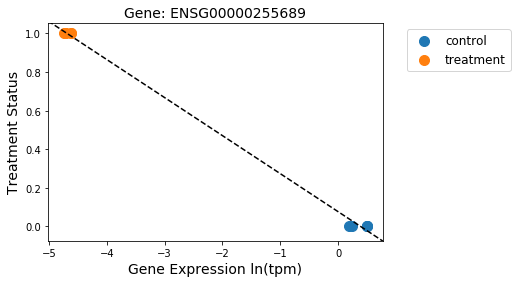

In [124]:
plot_gene('ENSG00000255689',expr_data,phenos,ols)

<h3 style="color:red;"> What are we missing? </h3>

\begin{equation*}\large Y(x_i) = B_0 + B_1x_i + \epsilon_i \end{equation*}

<h3 style="color:red;"> Exercise: Run the linear model for ENSG00000137563. What is different about this example?</h3>

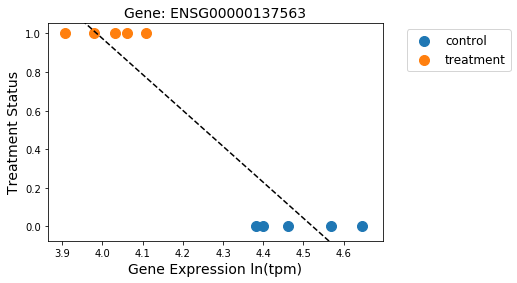

In [126]:
X = sm.add_constant(expr_data.loc["ENSG00000137563",:].values)
y = phenos["outcome"].values

ols = sm.OLS(y,X).fit()

plot_gene('ENSG00000137563',expr_data,phenos,ols)

`Generalized linear models`(GLMs) are a flexible version of the linear regression model. While linear regression assumes the `dependent` variable is **normally distributed**, we can use a `GLM` to apply these same concepts to our **binary** dataset. For example `logistic regression` is a type of `GLM` that uses log transformation: $logit(Y(x_i))$.

In [128]:
glm = sm.GLM(y,X,family=sm.families.Binomial()).fit(maxiter=1)

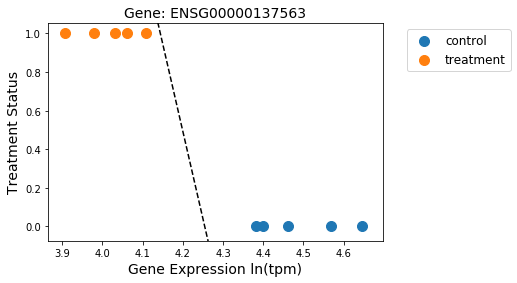

In [129]:
plot_gene('ENSG00000137563',expr_data,phenos,glm)

In [134]:
ols.predict(np.array([1,4.2]))

array([0.60177136])

In [135]:
glm.predict(np.array([1,4.2]))

array([0.62128473])

<h3 style="color:red;"> Exercise: Perform regression for all genes and save coeficients and p-values to a dataframe. </h3>

There are a couple errors here, find them and fix them. **Use the error messages to guide you to the lines that need fixed!**

**Hint:** When debugging code un a `for` loop it helps to look at just one element at a time. You can either do this with `print` statements or by subsetting data to one or a few examples `expr_data.index[:n]`.

In [136]:
import tqdm

In [147]:
coefs_df = pd.DataFrame(index=expr_data.index,columns=["coef","p-value"])
# this is a dictionary, we will use it to hold our models so we can make plots later
models = {}
# Loop through genes
for gene in tqdm.tqdm(expr_data.index):
    X = expr_data.loc[gene,:].values
    X = sm.add_constant(X)
    y = phenos.loc[:,"outcome"].values
    # Fit model
    lr = sm.GLM(y,X,family=sm.families.Binomial()).fit(maxiter=1)
    models[gene] = lr
    # Extract coeficient and p-value for the gene
    pvals = lr.pvalues[1]
    coefs = lr.params[1]
    coefs_df.loc[gene,:] = [coefs,pvals]

100%|██████████| 14271/14271 [00:44<00:00, 320.36it/s]


In [150]:
models.values()

dict_values([<statsmodels.genmod.generalized_linear_model.GLMResultsWrapper object at 0x1c1f2c92b0>, <statsmodels.genmod.generalized_linear_model.GLMResultsWrapper object at 0x1c1f90d0f0>, <statsmodels.genmod.generalized_linear_model.GLMResultsWrapper object at 0x1c1f9130f0>, <statsmodels.genmod.generalized_linear_model.GLMResultsWrapper object at 0x1c1f913630>, <statsmodels.genmod.generalized_linear_model.GLMResultsWrapper object at 0x1c1f913160>, <statsmodels.genmod.generalized_linear_model.GLMResultsWrapper object at 0x1c1f9201d0>, <statsmodels.genmod.generalized_linear_model.GLMResultsWrapper object at 0x1c1fb3d470>, <statsmodels.genmod.generalized_linear_model.GLMResultsWrapper object at 0x1c1f915978>, <statsmodels.genmod.generalized_linear_model.GLMResultsWrapper object at 0x1c1fb32dd8>, <statsmodels.genmod.generalized_linear_model.GLMResultsWrapper object at 0x1c1fb32588>, <statsmodels.genmod.generalized_linear_model.GLMResultsWrapper object at 0x1c1fb32978>, <statsmodels.genmod

In [149]:
models.keys()

dict_keys(['ENSG00000241362', 'ENSG00000260571', 'ENSG00000205693', 'ENSG00000239775', 'ENSG00000259444', 'ENSG00000235272', 'ENSG00000263432', 'ENSG00000260418', 'ENSG00000220323', 'ENSG00000248709', 'ENSG00000231702', 'ENSG00000256553', 'ENSG00000258732', 'ENSG00000254719', 'ENSG00000256590', 'ENSG00000237854', 'ENSG00000230397', 'ENSG00000259760', 'ENSG00000255689', 'ENSG00000235576', 'ENSG00000157368', 'ENSG00000235077', 'ENSG00000238005', 'ENSG00000267405', 'ENSG00000260342', 'ENSG00000232445', 'ENSG00000146963', 'ENSG00000131400', 'ENSG00000211896', 'ENSG00000185269', 'ENSG00000199488', 'ENSG00000272646', 'ENSG00000172016', 'ENSG00000237437', 'ENSG00000239419', 'ENSG00000211943', 'ENSG00000270761', 'ENSG00000215158', 'ENSG00000211649', 'ENSG00000259108', 'ENSG00000226091', 'ENSG00000167914', 'ENSG00000257649', 'ENSG00000141068', 'ENSG00000204338', 'ENSG00000205105', 'ENSG00000182612', 'ENSG00000189419', 'ENSG00000139445', 'ENSG00000136634', 'ENSG00000254528', 'ENSG00000152433', '

In [152]:
coefs_df = coefs_df.sort_values(by="p-value")

In [153]:
coefs_df.head()

,coef,p-value
gene_id,,
ENSG00000255689,-0.957933,0.000877026
ENSG00000182326,-7.13731,0.00103426
ENSG00000116771,-9.75183,0.0010478
ENSG00000055955,-6.87401,0.00105187
ENSG00000068078,-6.5493,0.00105608


### Interpret results

In [155]:
gene = coefs_df.index[0]

In [156]:
models[gene]

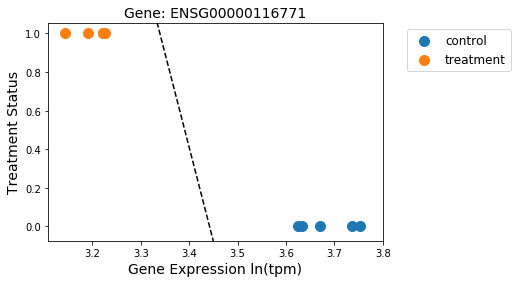

In [159]:
plot_gene(coefs_df.index[2],expr_data,phenos,models[coefs_df.index[2]])
plt.show()

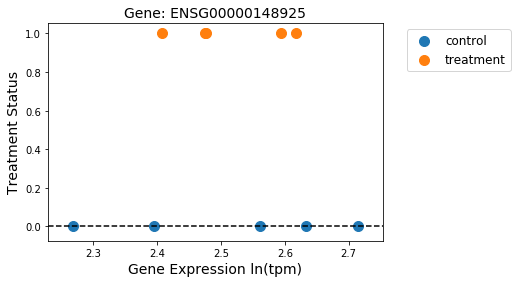

In [160]:
plot_gene(coefs_df.index[-1],expr_data,phenos,models[coefs_df.index[-1]])
plt.show()

<h3 style="color:red;"> Exercise: Find the gene with the lowest p-value that is up-regulated in treatment cases. </h3>

In [170]:
0.05/len(coefs_df)

3.503608716978488e-06

In [169]:
coefs_df

,coef,p-value
gene_id,,
ENSG00000255689,-0.957933,0.000877026
ENSG00000182326,-7.13731,0.00103426
ENSG00000116771,-9.75183,0.0010478
ENSG00000055955,-6.87401,0.00105187
ENSG00000068078,-6.5493,0.00105608
ENSG00000115828,3.51576,0.00107548
ENSG00000164465,8.73722,0.00108823
ENSG00000109956,-3.13963,0.00109254
ENSG00000242612,-12.6682,0.00109301


In [166]:
up_gene = coefs_df[coefs_df["coef"]>0].index[0]

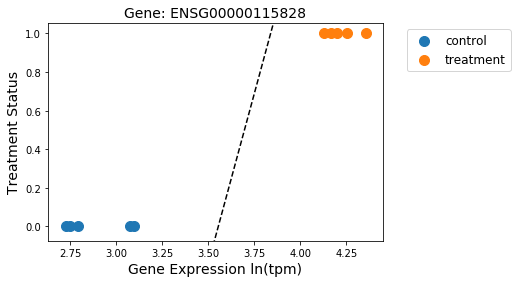

In [168]:
plot_gene(up_gene,expr_data,phenos,models[up_gene])

## Additional Materials <a class="anchor" id="5"></a>

### Extra Challenges <a class="anchor" id="5a"></a>

#### Correct for multiple testing with permutation tests

In [ ]:
def perm_pval(X,y,true_coef,nperms=5000):
    """
    Perform permutation testing by shuffling the phenotypes
    
    Parameters
    ----------
    X : np.array
        Data matrix with features
    y : np.array
        Sample phenotypes
    true_coef : int , optional
        Number of times to permute your data
    
    Returns
    -------
    np.array
        p-values from permutation test 
    """
    coef_rand = []
    for i in range(nperms):
        y_rand = np.random.permutation(y)
        lr_rand = sm.GLM(y_rand,X,family=sm.families.Binomial())
        lr_rand = lr_rand.fit(maxiter=1)
        coef_rand.append(lr_rand.params[1])
    pval = sum(np.absolute(coef_rand)>=np.absolute(true_coef))/nperms
    return pval

#### Determine which genes are not significant given the permutation p-value

In [ ]:
coefs_df_mult = pd.DataFrame(index=expr_data.index,columns=["coef","p-value","perm_p"])
for gene in tqdm.tqdm(expr_data.index[:5]):
    X = sm.add_constant(expr_data.loc[gene,:].values)
    y = phenos.loc[:,"outcome"].values

    lr = sm.GLM(y,X,family=sm.families.Binomial()).fit(maxiter=1)

    pvals = lr.pvalues
    coefs = lr.params
    
    permP = perm_pval(X,y,coefs[1])
    coefs_df_mult.loc[gene,:] = [coefs[1],pvals[1],permP]

In [ ]:
coefs_df_mult.head()

### Extra Resources <a class="anchor" id="5b"></a>

#### Additional flavors of regression:
- `Regularization` 
    * A way to discourage model complexity ([bias-variance tradeoff](https://cdn-images-1.medium.com/max/1600/1*9hPX9pAO3jqLrzt0IE3JzA.png))
    * Used to avoid over-fitting to training data 
    * [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) 
, [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
, [Elastic Net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

- `Cox models`
    * Used to measure time-dependent effects
    * [Python tutorial](https://www.statsmodels.org/stable/duration.html)

- `Cross validation`
    * This is something we do to ensure we have the best model parameters without overfitting to our data.
    * [Further description and implementation](https://scikit-learn.org/stable/modules/cross_validation.html)